## RIR Demo

The goal of this notebook is to give an insight on the effect of the room's size and of the absorption coefficient on the Room Impulse Response.

For this experiment, we will use a simple trapezoidal rooom with dimensions shown below.
- if you choose a 'medium' sized room, all three dimensions are multiplied by 2.5
- if you choose a 'large' sized room, all three dimensions are multiplied by 5

The microphone has always the same relative position with respect to the dimensions of the room. Its radius ($0.15 m$) is constant in all scenarios.

The absorption coefficient will be the same for every wall (including ceiling and floor):
- 'high' absorption gives a coefficient of 0.7
- 'medium' absorption gives a coefficient of 0.3
- 'low' absorption gives a coefficient of 0.1

### We need the following imports

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from scipy.io import wavfile
import IPython

In [2]:
fs, audio_anechoic = wavfile.read('arctic_a0010.wav')
IPython.display.display(IPython.display.Audio(audio_anechoic, rate=fs))

### The room looks like this

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/scheibler/anaconda3/envs/pyroomacoustics/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


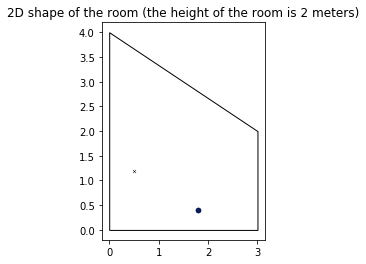

In [3]:
pol = np.array([[0,0], [0,4], [3,2], [3,0]]).T
room = pra.Room.from_corners(pol, fs=16000, max_order=10, absorption=0.1)

# Adding the source
room.add_source(np.array([1.8, 0.4]), signal=audio_anechoic)

# Adding the microphone
R = np.array([[0.5],[1.2],[0.5]])
room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

room.plot()
plt.title("2D shape of the room (the height of the room is 2 meters)")
plt.show()

### We are going to apply the RIR to the following audio file :

### Here is the function that will create the room in function of the desired size and absorption coefficient

In [4]:
def get_rir(size='medium', absorption='medium'):

    
    if absorption=='high':
        absor = 0.7
    elif absorption=='medium':
        absor = 0.3
    elif absorption=='low':
        absor = 0.1
    else:
        raise ValueError("The absorption parameter can only take values ['low', 'medium', 'high']")
    
    if size=='large':
        size_coef = 5.
    elif size=='medium':
        size_coef = 2.5
    elif size=='small':
        size_coef = 1.
    else:
        raise ValueError("The size parameter can only take values ['small', 'medium', 'large']")
        
        
    pol = size_coef * np.array([[0,0], [0,4], [3,2], [3,0]]).T
    room = pra.Room.from_corners(pol, fs=16000, max_order=10, absorption=absor)

    # Create the 3D room by extruding the 2D by a specific height
    room.extrude(size_coef * 2.5, absorption=absor)

    # Adding the source
    room.add_source(size_coef * np.array([1.8, 0.4, 1.6]), signal=audio_anechoic)

    # Adding the microphone
    R = size_coef * np.array([[0.5],[1.2],[0.5]])
    room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

    # Compute the RIR using the hybrid method
    room.compute_rir(mode='hybrid', nb_thetas=500, nb_phis=500, scatter_coef=0.)

    # Plot and apply the RIR on the audio file
    room.plot_rir()
    plt.show()
    room.simulate()
    room.mic_array.to_wav('aaa.wav', norm=True, bitdepth=np.int16)
    
    # Display the audio file
    fs_result, result = wavfile.read('aaa.wav')
    IPython.display.display(IPython.display.Audio(result, rate=fs_result))



### Let's see the results for all the possible combination of the two parameters

In [ ]:
get_rir(size='small', absorption='low')

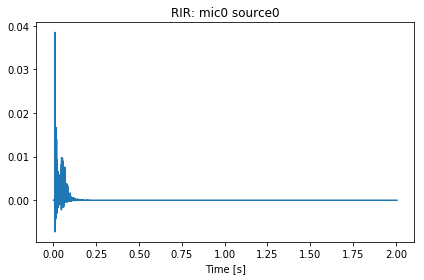

In [40]:
get_rir(size='small', absorption='medium')

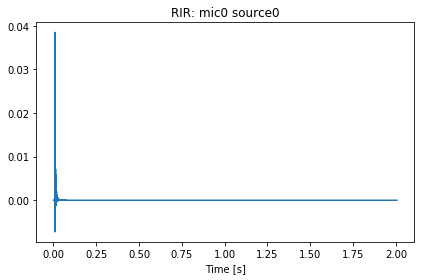

In [41]:
get_rir(size='small', absorption='high')

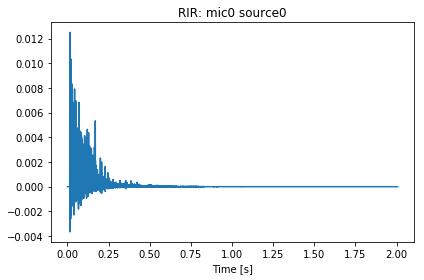

In [42]:
get_rir(size='medium', absorption='low')

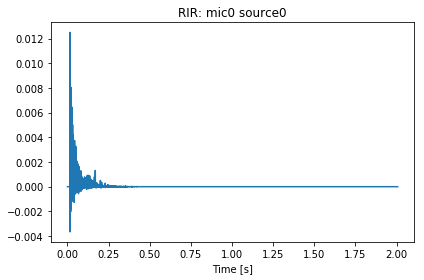

In [43]:
get_rir(size='medium', absorption='medium')

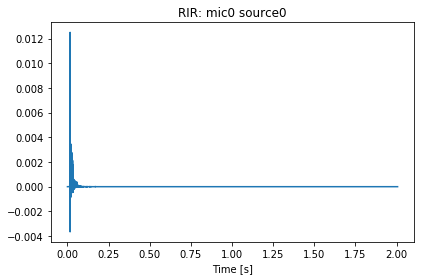

In [44]:
get_rir(size='medium', absorption='high')

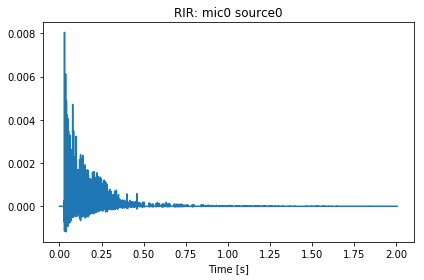

In [45]:
get_rir(size='large', absorption='low')

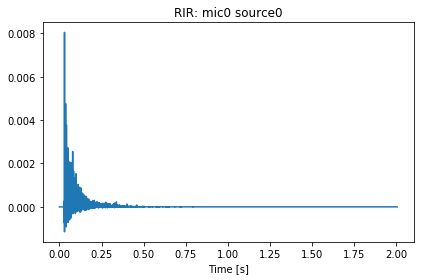

In [46]:
get_rir(size='large', absorption='medium')

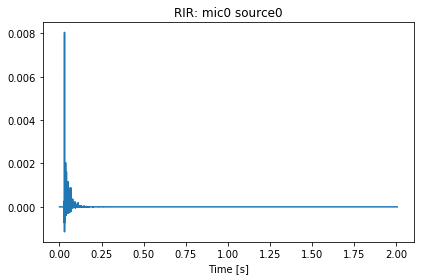

In [47]:
get_rir(size='large', absorption='high')